IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: programmation du perceptron

Dans ce TP, nous allons principalement programmer un perceptron, en nous restreignant au cas binaire où les données sont étiquetées $+1$ ou $-1$ (comme les TP précédents).

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ryan OHOUENS - Sarah SALEH

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-03</tt> et rajouter à la suite de <tt>tme-03</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-03-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Création d'une librairie

Afin de pouvoir réutiliser les classes et fonctions écrites dans les séances de TDTME précédentes, on va construire une librairie qu'il suffira d'importer.

Récupérer l'archive iads.tgz et la désarchiver de telle sorte que le répertoire iads soit un répertoire frère du répertoire tme03.

Ainsi, vous devrez avoir l'arborescence suivante dans votre répertoire $HOME:

    - 3i026/
        - tme01/
            - tme01.ipynb
        - tme02/
            - tme02.ipynb
        - tme03/
            - tme03.ipynb
        - iads/
            - Classifiers.py
            - LabeledSet.py
            - utils.py
          

**Important** :
- ce fichier tme03.ipynb doit toujours rester dans le répertorie tme03/
- pour ouvrir les fichiers py qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...


<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans le TDTME précédent pour compléter toute les parties indiquées <tt>#TODO</tt>.
- dans utils.py, il faut compléter la fonction createGaussianDataset
- dans Classifiers.py, il faut compléter le code des classifiers

Une fois ces fichiers complétés, la librairie <tt>iads</tt> peut être importée dans ce notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
#from iads import utils as ut

In [33]:
def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1

def plot_frontiere(set,classifier,step=50):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])
    
# ------------------------ 

def createGaussianDataset(positive_center, positive_sigma, negative_center, negative_sigma, nb_points):
    """ 
        rend un LabeledSet 2D généré aléatoirement.
        Arguments:
        - positive_center (vecteur taille 2): centre de la gaussienne des points positifs
        - positive_sigma (matrice 2*2): variance de la gaussienne des points positifs
        - negative_center (vecteur taille 2): centre de la gaussienne des points négative
        - negative_sigma (matrice 2*2): variance de la gaussienne des points négative
    - nb_points (int):  nombre de points de chaque classe à générer
"""
#TODO: A Compléter
    x, y = np.random.multivariate_normal(positive_center, positive_sigma, nb_points).T
    a, b = np.random.multivariate_normal(negative_center, negative_sigma, nb_points).T
    label = ls.LabeledSet(2)
    for i in range(len(a)):
        label.addExample(np.array([x[i], y[i]]), 1)
        label.addExample(np.array([a[i], b[i]]),-1)
    return label

    raise NotImplementedError("Please Implement this method")
    
    

La commande <tt>help</tt> permet d'avoir des informations sur le contenu d'une librairie importée:

In [8]:
help(iads)

Help on package iads:

NAME
    iads

DESCRIPTION
    Package: iads
    File: __init__.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

PACKAGE CONTENTS
    Classifiers
    LabeledSet
    util_iads

FILE
    /users/nfs/Etu5/3670015/3i026/iads/__init__.py




In [9]:
help(ls)

Help on module iads.LabeledSet in iads:

NAME
    iads.LabeledSet

DESCRIPTION
    Package: iads
    Fichier: LabeledSet.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        LabeledSet
    
    class LabeledSet(builtins.object)
     |  Classe pour représenter un ensemble d'exemples (base d'apprentissage)
     |  Variables d'instance :
     |      - input_dimension (int) : dimension de la description d'un exemple (x)
     |      - nb_examples (int) : nombre d'exemples dans l'ensemble
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de LabeledSet
     |      Argument: 
     |          - intput_dimension (int) : dimension de x
     |      Hypothèse : input_dimension > 0
     |  
     |  addExample(self, vector, label)
     |      Ajout d'un exemple dans l'ensemble
     |      Argument: 
     |          - vector ()
     |          - label (int) : classe de l'exemple (+1 ou -1)
     |  

In [10]:
help(cl)

Help on module iads.Classifiers in iads:

NAME
    iads.Classifiers

DESCRIPTION
    Package: iads
    Fichier: Classifiers.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        Classifier
            ClassifierKNN
            ClassifierLineaireRandom
    
    class Classifier(builtins.object)
     |  Classe pour représenter un classifieur
     |  Attention: cette classe est une classe abstraite, elle ne peut pas être
     |  instanciée.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de Classifier
     |      Argument:
     |          - intput_dimension (int) : dimension d'entrée des exemples
     |      Hypothèse : input_dimension > 0
     |  
     |  accuracy(self, dataset)
     |      Permet de calculer la qualité du système
     |  
     |  predict(self, x)
     |      rend la prediction sur x (-1 ou +1)
     |  
     |  train(self, labeledSet)
     |      Permet d'entrainer l

Dans les boîtes suivantes, on utilise ces librairies avec les exemples vus en TDTME-02.

In [34]:
# Exemple d'utilisation de LabeledSet

une_base = ls.LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D

une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1

# Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

# Affichage de la base
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


Taille de la base jouet générée : 20 exemples


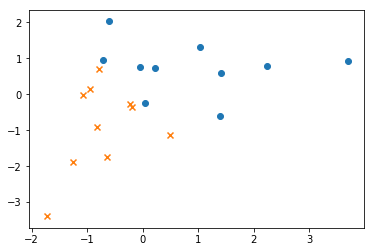

In [35]:
# Exemple d'utilisation de utils

the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)


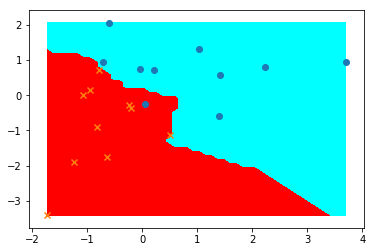

In [36]:
# Exemple d'utilisation de Classifiers pour créer un knn:

knn = cl.ClassifierKNN(2,3)

knn.train(the_set)

plot_frontiere(the_set,knn)
plot2DSet(the_set)

<font color="RED" size="+2">**Très important**</font>: tout le reste du travail à faire dans ce TDTME ne doit être fait que dans le notebook. Il ne faut plus modifier les fichiers de la librairie.

Le compte-rendu de cette séance ne comportera que le fichier notebook.


Perceptron aléatoire
====

La classe <tt>ClassifierPerceptronRandom</tt> suivante hérite de la classe `Classifier`. Elle implémente un modèle de perceptron aléatoire qui modélise un hyperplan $f_\theta(x)=\langle \theta ; x \rangle$ tel que $\theta$ est tiré aléatoirement lors de la création.





In [37]:
class ClassifierPerceptronRandom(cl.Classifier):
    def __init__(self, input_dimension):
        """ Argument:
                - input_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        self.w = np.random.rand(input_dimension)

    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """        
        print("No training needed")

<font color="RED" size="+1">**[Q]**</font> Tester ce modèle de perceptron sur un jeu de données aléatoire.


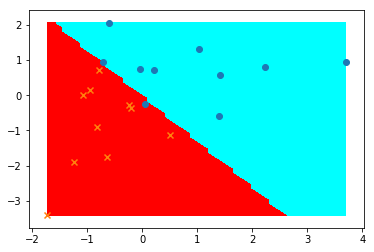

In [39]:
# Exemple de création et d'utilisation d'un Perceptron aléatoire:

perceptron_random = ClassifierPerceptronRandom(2)

plot_frontiere(the_set,perceptron_random)
plot2DSet(the_set)

Perceptron de Rosenblatt
===

<font color="RED" size="+1">**[Q]**</font> En héritant de la classe `Classifier`, écrire la classe <tt>ClassifierPerceptron</tt> qui implémente l'algorithme du Perceptron de Rosenblatt vu en cours.

La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.



In [138]:
class ClassfierPerceptron(cl.Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.w = np.random.rand(1, input_dimension)
        self.e = learning_rate

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        if(np.dot(self.w, x) > 0):
            return 1
        return -1
    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        indice = np.arange(labeledSet.size())
        temoin = np.random.permutation(indice)
        for i in temoin:
            obtenu = self.predict(labeledSet.getX(i))
            if(obtenu != labeledSet.getY(i)):
                self.w = self.w + self.e*labeledSet.getY(i)*labeledSet.getX(i)
    



In [139]:
def split(label) :

    size = label.size()

    label_train = ls.LabeledSet(label.getInputDimension())
    label_test = ls.LabeledSet(label.getInputDimension())

    plus = 0
    moins = 0
    for i in range(size) :
        if(label.getY(i) == 1) :
            if(plus == 0) :
                label_train.addExample(label.getX(i), label.getY(i))
                plus = 1
            else :
                label_test.addExample(label.getX(i), label.getY(i))
                plus = 0
        else :
            if(moins == 0) :
                label_train.addExample(label.getX(i), label.getY(i))
                moins = 1
            else :
                label_test.addExample(label.getX(i), label.getY(i))
                moins = 0
    return (label_train, label_test)

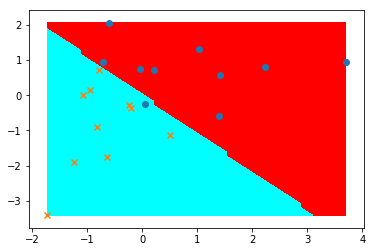

In [140]:
perceptron_rosenbalt = ClassfierPerceptron(une_base.input_dimension,5)
perceptron_rosenbalt.train(une_base)

plot_frontiere(the_set,perceptron_rosenbalt)
plot2DSet(the_set)
raise NotImplementedError("Please Implement this method")
#après 1 les points ne sont pas là où ils devraient se situer, on ne s'est pas assez entrainé.

<font color="RED" size="+1">**[Q]**</font> Tester le perceptron de la manière suivante:
- Apprendre pendant N itérations
- Afficher l'accuracy du modèle à chaque itération
- Vérifier que l'accuracy baisse
- Dessiner la frontière obtenue

No handles with labels found to put in legend.


0 entrainement
Accuracy 90.0%

1 entrainement
Accuracy 90.0%

2 entrainement
Accuracy 90.0%

3 entrainement
Accuracy 88.0%

4 entrainement
Accuracy 87.0%

5 entrainement
Accuracy 88.0%

6 entrainement
Accuracy 88.0%

7 entrainement
Accuracy 87.0%

8 entrainement
Accuracy 87.0%

9 entrainement
Accuracy 90.0%

10 entrainement
Accuracy 90.0%

11 entrainement
Accuracy 90.0%

12 entrainement
Accuracy 79.0%

13 entrainement
Accuracy 88.0%

14 entrainement
Accuracy 88.0%

15 entrainement
Accuracy 86.0%

16 entrainement
Accuracy 81.0%

17 entrainement
Accuracy 89.0%

18 entrainement
Accuracy 88.0%

19 entrainement
Accuracy 89.0%

20 entrainement
Accuracy 87.0%

21 entrainement
Accuracy 82.0%

22 entrainement
Accuracy 87.0%

23 entrainement
Accuracy 87.0%

24 entrainement
Accuracy 87.0%

25 entrainement
Accuracy 87.0%

26 entrainement
Accuracy 90.0%

27 entrainement
Accuracy 88.0%

28 entrainement
Accuracy 89.0%

29 entrainement
Accuracy 87.0%

30 entrainement
Accuracy 84.0%

31 entrainement
Ac

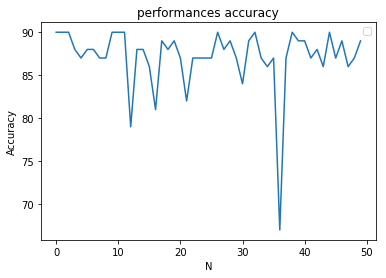

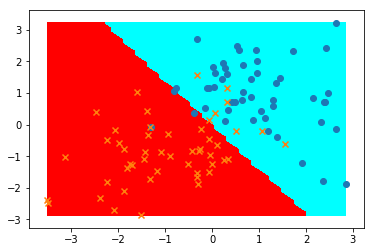

In [146]:
def super_entrainement(n, label) :
    perceptron = ClassfierPerceptron(label.input_dimension,0.5)
    x = []
    y = []
    for i in range(n) :
        train, test = split(label)
        print(str(i) + " entrainement")
        perceptron.train(train)
        train = perceptron.accuracy(test)
        print("Accuracy "+str(train)+"%\n")
        y.append(train)
        x.append(i)
    plt.plot(x,y)
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.title('performances accuracy')
    plt.legend()
    plt.show()
    plot_frontiere(test,perceptron)
    plot2DSet(test)
 
the_set2 = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
super_entrainement(50,the_set2)

In [145]:
#La frontière est cohérente.
#au fur et à mesure des apprentissages, on remarque que le fait de faire varier epsilon n'influe
#pas vraiment sur la courbe représentant l'accuracy. Cela dépend de la position de 
#départ du vecteur w.


#Le pique de différence au niveau de la courbe de l'accuracy n'est pas forcément choquante, 
#car nous pouvons estimer que les changements s'effectuent au niveau des points qui sont 
#intégrés dans la classe opposée.

<font color="RED" size="+1">**[Q]**</font> Expérimentations

- Générer deux ensembles de train et de test
- Dessiner la courbe de performance en fonction de l'itération sur les ensembles de train et de test
    * Que se passe-t-il en fonction du pas (epsilon) d'apprentissage ? 
    * Que se passe-t-il quand le nombre d'exemples en apprentissage est faible ? 


In [ ]:
#La frontière de décision semble cohérente.
#au fur et à mesure des apprentissages, on remarque que le fait de faire varier epsilon n'influe
#pas vraiment sur la courbe représentant l'accuracy. Cela dépend de la position de 
#départ du vecteur w.


#Quand le nombre d'apprentissage est faible, l'accuracy ne varie pas.

<font color="RED" size="+1">**[Q]**</font> **Données XOR**

Ecrire la fpnction `createXOR`qui, étant donné un nombre de points $n$ et une variance $var$, permet de générer une base de données contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à $n$ exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à $n$ exemples négatifs

Dans la suite, on appelle XOR une base de données créée par cette fonction.


Que se passe-t-il quand on apprend un perceptron  ? Quel est le problème ? 

In [161]:
def createXOR(nb_points,var):
    ##TODO
    variance = np.array([[var,0],[0,var]])
    g1 = createGaussianDataset(np.array([0,0]),variance,np.array([1,0]),variance,nb_points*2)
    g2 = createGaussianDataset(np.array([1,1]),variance,np.array([0,1]),variance,nb_points*2)
    
    for i in range(g1.size()):
        g2.addExample(g1.getX(i), g1.getY(i))
    return g2

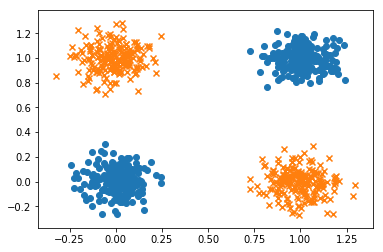

In [162]:
xor=createXOR(100,0.01)
plot2DSet(xor)

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [163]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(the_set.getX(1))


array([-0.95332527,  0.14445426,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [177]:
class ClassifierPerceptronKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        ##TODO
        self.dimension_kernel = dimension_kernel
        self.learning_rate = learning_rate
        self.kernel = kernel
        self.perceptron = ClassfierPerceptron(dimension_kernel, learning_rate)
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        ##TODO
        self.perceptron.predict(self.kernel.transform(x))

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ##TODO
        self.perceptron.train(labeledSet)
        

In [ ]:
# ------------------------ (CORRECTION POUR ENSEIGNANT)


<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

In [178]:
class KernelPoly:
    def transform(self,x):
       ##TODo
        y=np.asarray([1,x[0],x[1],x[0]*x[0],x[1]*x[1], x[0] * x[1] ])
        return y    


        
N=100
k=KernelPoly()
perceptron_k= ClassifierPerceptronKernel(6,0.001,k)
print(k.transform(xor.getX(0)))

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION
def hyper_entrainement(n, label, k) :
    perceptron = ClassifierPerceptronKernel(label.input_dimension,0.5, k)
    x = []
    y = []
    for i in range(n) :
        train, test = split(label)
        print(str(i) + " entrainement")
        perceptron.train(train)
        train = perceptron.accuracy(test)
        print("Accuracy "+str(train)+"%\n")
        y.append(train)
        x.append(i)
    plt.plot(x,y)
    plt.xlabel('N')
    plt.ylabel('Accuracy')
    plt.title('performances accuracy')
    plt.legend()
    plt.show()
    plot_frontiere(test,perceptron)
    plot2DSet(test)
 
hyper_entrainement(100,xor, k)

[1.         1.03398763 0.93961522 1.06913042 0.88287677 0.97155052]
0 entrainement


ValueError: shapes (1,2) and (6,) not aligned: 2 (dim 1) != 6 (dim 0)

Expérimentations sur des datasets réels
-------



A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.